# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
all_data = []
for i, city in enumerate (cities):
    city_url = url + "&q=" + city
    try :
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        all_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except : 
        print('city not found')
    

city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
all_data

[{'City': 'albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 36.18,
  'Humidity': 72,
  'Cloudiness': 100,
  'Wind Speed': 2.35,
  'Country': 'US',
  'Date': 1638305238},
 {'City': 'katsuura',
  'Lat': 35.1333,
  'Lng': 140.3,
  'Max Temp': 66.22,
  'Humidity': 90,
  'Cloudiness': 100,
  'Wind Speed': 38.92,
  'Country': 'JP',
  'Date': 1638305406},
 {'City': 'tautira',
  'Lat': -17.7333,
  'Lng': -149.15,
  'Max Temp': 86.02,
  'Humidity': 78,
  'Cloudiness': 100,
  'Wind Speed': 21.07,
  'Country': 'PF',
  'Date': 1638305407},
 {'City': 'talnakh',
  'Lat': 69.4865,
  'Lng': 88.3972,
  'Max Temp': -20.79,
  'Humidity': 94,
  'Cloudiness': 20,
  'Wind Speed': 9.04,
  'Country': 'RU',
  'Date': 1638305407},
 {'City': 'chuy',
  'Lat': -33.6971,
  'Lng': -53.4616,
  'Max Temp': 67.35,
  'Humidity': 82,
  'Cloudiness': 26,
  'Wind Speed': 14.18,
  'Country': 'UY',
  'Date': 1638305407},
 {'City': 'victoria',
  'Lat': 22.2855,
  'Lng': 114.1577,
  'Max Temp': 62.33,
  'Humidity': 

In [21]:
df_data = pd.DataFrame(all_data)
df_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,36.18,72,100,2.35,US,1638305238
1,katsuura,35.1333,140.3000,66.22,90,100,38.92,JP,1638305406
2,tautira,-17.7333,-149.1500,86.02,78,100,21.07,PF,1638305407
3,talnakh,69.4865,88.3972,-20.79,94,20,9.04,RU,1638305407
4,chuy,-33.6971,-53.4616,67.35,82,26,14.18,UY,1638305407
...,...,...,...,...,...,...,...,...,...
532,bay roberts,47.5999,-53.2648,50.32,89,100,14.00,CA,1638305615
533,pirgos,35.1167,25.7178,59.63,56,59,13.67,GR,1638305616
534,poya,-21.3500,165.1500,82.89,71,2,2.75,NC,1638305616
535,xingyi,24.1877,102.8170,39.36,93,19,1.95,CN,1638305617


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
df_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,5.370000e+02
mean,19.038731,13.732959,54.034022,71.106145,57.314711,8.309013,1.638305e+09
std,33.283837,91.383243,29.496245,21.176715,40.160262,6.402530,8.423809e+01
min,-54.800000,-175.200000,-40.290000,8.000000,0.000000,0.000000,1.638305e+09
25%,-10.454400,-68.591400,36.010000,61.000000,13.000000,3.490000,1.638305e+09
50%,24.187700,19.026600,64.090000,76.000000,74.000000,6.620000,1.638305e+09
75%,46.550000,92.900000,77.090000,86.000000,99.000000,11.500000,1.638306e+09
max,78.218600,179.316700,93.740000,100.000000,100.000000,43.240000,1.638306e+09


In [23]:
#  Get the indices of cities that have humidity over 100%.


In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temp')

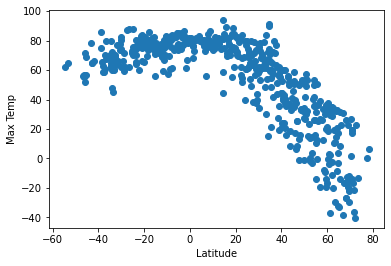

In [25]:
plt.scatter(df_data['Lat'],df_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

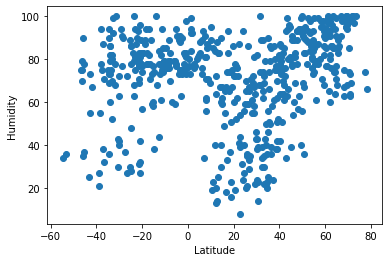

In [26]:
plt.scatter(df_data['Lat'],df_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel ('Humidity')

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

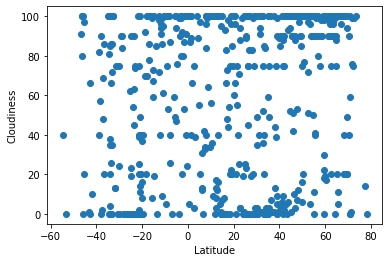

In [27]:
plt.scatter(df_data['Lat'],df_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel ('Cloudiness')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

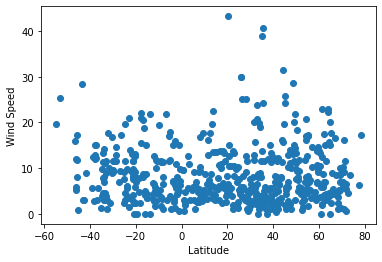

In [28]:
plt.scatter(df_data['Lat'],df_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel ('Wind Speed')

## Linear Regression

In [29]:
data_north= df_data.loc[df_data['Lat']>= 0]
data_south= df_data.loc[df_data['Lat']< 0]

In [30]:
def Graph_Reg (x_values, y_values): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    plt.scatter(x_values,y_values)
    plt.plot (x_values,regression_values, 'r-')
    plt.show

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

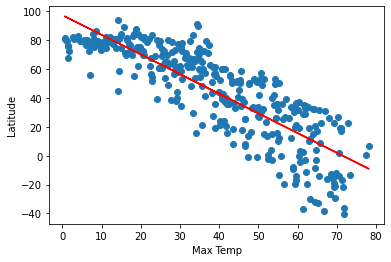

In [32]:
Graph_Reg (data_north ['Lat'], data_north ['Max Temp'])
plt.xlabel('Max Temp')
plt.ylabel ('Latitude')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Max Temp')

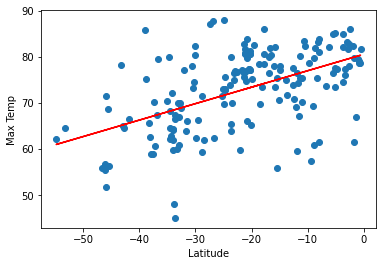

In [33]:
Graph_Reg(data_south ['Lat'], data_south ['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Humidity')

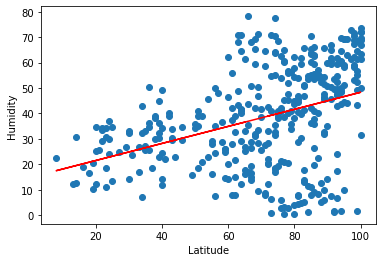

In [34]:
Graph_Reg(data_north['Humidity'], data_north ['Lat'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

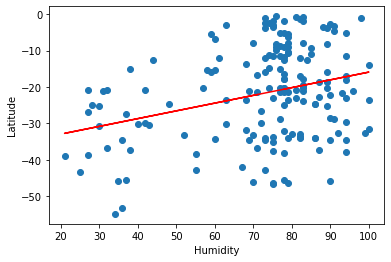

In [35]:
Graph_Reg(data_south['Humidity'], data_south ['Lat'])
plt.xlabel('Humidity')
plt.ylabel('Latitude')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Cloudiness')

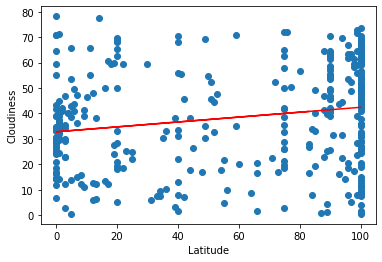

In [36]:
Graph_Reg(data_north['Cloudiness'], data_north['Lat'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

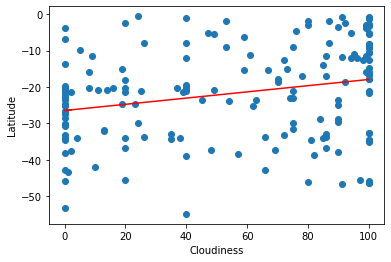

In [37]:
Graph_Reg(data_south['Cloudiness'],data_south['Lat'])
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

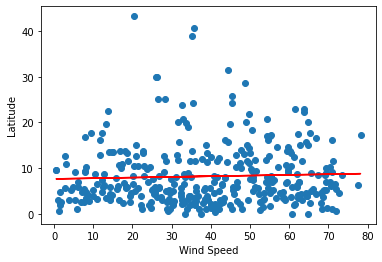

In [39]:
Graph_Reg(data_north['Lat'],data_north['Wind Speed'])
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Wind Speed')

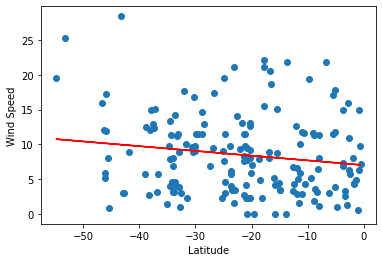

In [40]:
Graph_Reg(data_south['Lat'], data_south['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')